In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

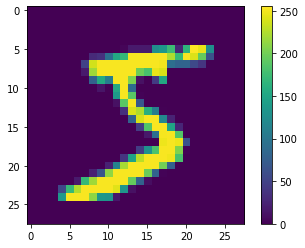

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

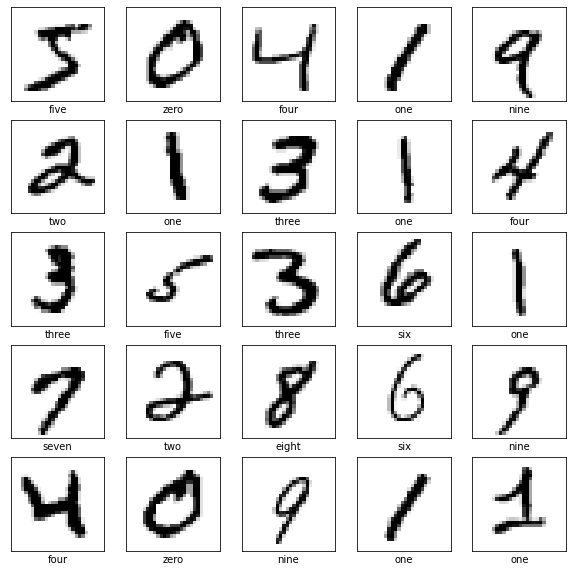

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9281
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [15]:
test_loss, test_acc  = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.0782 - accuracy: 0.9782 - 455ms/epoch - 1ms/step

Test Accuracy: 0.9782000184059143


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([6.75963174e-11, 1.79520756e-11, 1.34761855e-08, 5.68055439e-05,
       9.32383375e-15, 3.01925207e-10, 2.50643217e-16, 9.99942183e-01,
       2.32964759e-09, 9.81474273e-07], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

In [21]:
# Graph 

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predicted_label),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

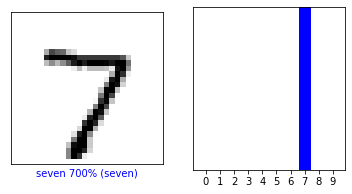

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

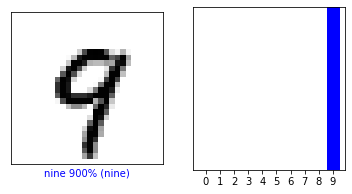

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

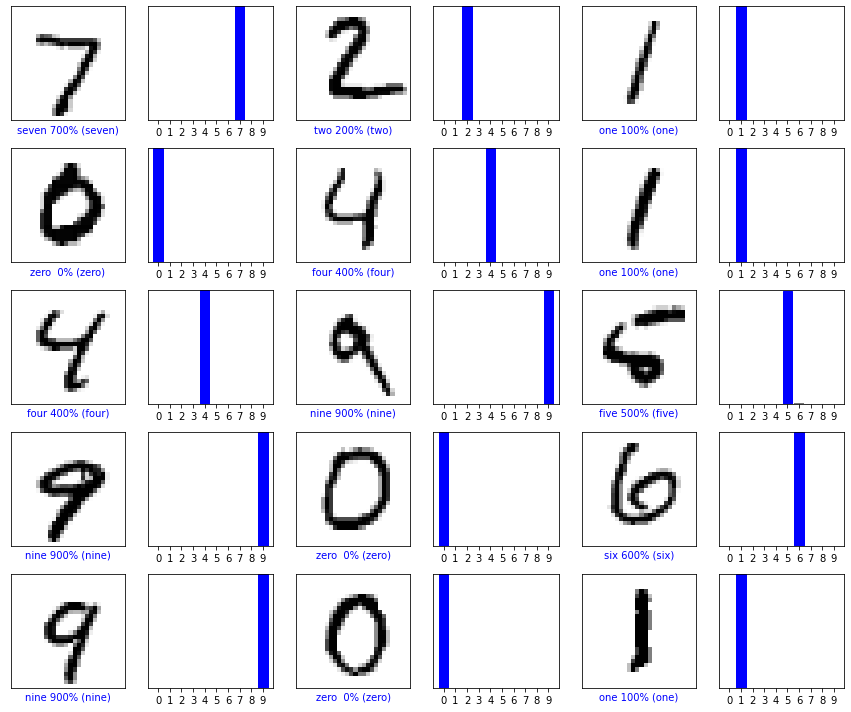

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.8501055e-11 1.2133460e-06 9.9999881e-01 2.7134190e-08 1.8601941e-22
  5.2319801e-11 2.4179086e-11 1.1089200e-19 1.1706475e-08 5.4061583e-19]]


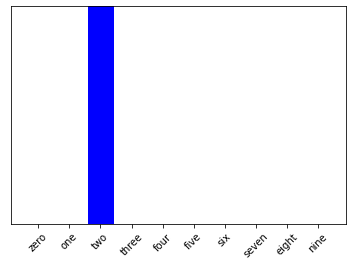

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2